In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import re
import unidecode
from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('TRABAJOPOLIS_FEB2019.csv',encoding='latin-1', sep=",")

In [4]:
df

,Nombre_Empresa,Id_Empleo,Ciudad,Categoria,Sueldo,Publicado,Vencimiento,Descripcion,Nombre_cargo,Enlace
0,Empresa de Servicios a Nivel Nacional,717052,"Sucre, Bolivia","Administración y Oficina,Dirección y Gerencia",No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa comercial busca incorporar ...,Coordinador(a) de Sucursal - Sucre,https://www.trabajopolis.bo/oferta-de-trabajo-...
1,Digital Tv Cable,717036,"Santa Cruz de la Sierra, Bolivia","Administración y Oficina,Atención al Cliente",Dependiendo de la Experiencia,05 Febrero 2019,07 Marzo 2019,digital tv cable internet esta buscando talen...,COORDINADOR (A) DE CALL CENTER Y ATC,https://www.trabajopolis.bo/oferta-de-trabajo-...
2,Electro Hogar S.R.L.,717026,"Santa Cruz de la Sierra, Bolivia",Administración y Oficina,De Bs. 2.060 a Bs. 2.999,05 Febrero 2019,07 Marzo 2019,secretaria recepcionista formacion conocimien...,Secretaria Recepcionista,https://www.trabajopolis.bo/oferta-de-trabajo-...
3,Cooperativa de Ahorro y Crédito Abierta Jesús ...,717041,"Sucre, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,ejecutivo de negociosede chuquisacaformacionfo...,Ejecutivo(a) de Negocio - Chuquisaca,https://www.trabajopolis.bo/oferta-de-trabajo-...
4,Canedo Strampfer Consultores SRL,716469,"Cochabamba, Bolivia",Arquitectura,Negociable,05 Febrero 2019,07 Marzo 2019,arquitectofunciones elaboracion de planos calc...,Arquitecto(a),https://www.trabajopolis.bo/oferta-de-trabajo-...
...,...,...,...,...,...,...,...,...,...,...
11822,EMPRESA IMPORTANTE,814138,"Santa Cruz de la Sierra, Bolivia",Marketing y Ventas,No Declarado,09 Diciembre 2019,08 Enero 2020,se necesita incorporar el siguiente personal b...,Brand Manager,https://www.trabajopolis.bo/oferta-de-trabajo-...
11823,Importante Empresa,814263,"Santa Cruz de la Sierra, Bolivia",Marketing y Ventas,No Declarado,09 Diciembre 2019,08 Enero 2020,importante empresa del rubro de la construccio...,Asesor(a) Comercial - Santa Cruz de la Sierra,https://www.trabajopolis.bo/oferta-de-trabajo-...
11824,EMPRESA DE SERVICIOS,814483,"Santa Cruz de la Sierra, Bolivia","AdministraciÃ³n y Oficina,AtenciÃ³n al Cliente",No Declarado,09 Diciembre 2019,08 Enero 2020,el gimnasio gymbox srl se encuentra en la busq...,Secretaria,https://www.trabajopolis.bo/oferta-de-trabajo-...
11825,Importante Empresa,808230,"Santa Cruz de la Sierra, Bolivia",Mano Obra Calificada,No Declarado,09 Diciembre 2019,08 Enero 2020,importante empresa requiere incorporarcocinero...,Cocinero(a),https://www.trabajopolis.bo/oferta-de-trabajo-...


In [5]:
df.Id_Empleo.unique().shape

(6522,)

In [6]:
df_new = df.drop_duplicates(subset ="Id_Empleo") 

In [7]:
df_new.set_index('Id_Empleo', verify_integrity = True, inplace = True)

In [8]:
df_new['Publicado'].value_counts()

14 Noviembre 2019    71
11 Enero 2019        67
04 Febrero 2019      60
15 Noviembre 2019    60
09 Agosto 2019       60
                     ..
22 Diciembre 2019     1
27 Enero 2019         1
28 Abril 2019         1
17 Febrero 2019       1
24 Noviembre 2019     1
Name: Publicado, Length: 232, dtype: int64

In [9]:
df_new['Sueldo'].value_counts()

No Declarado                      5008
Dependiendo de la Experiencia      305
De Bs. 3.000 a Bs. 3.999           295
De Bs. 2.122 a Bs. 2.999           209
De Bs. 2.060 a Bs. 2.999           203
Negociable                         193
De Bs. 4.000 a Bs. 4.999           118
De Bs. 5.000 a Bs. 5.999            55
De Bs. 6.000 a Bs. 6.999            39
De Bs. 10.000 a Bs. 14.999          34
De Bs. 7.000 a Bs. 7.999            22
De Bs. 8.000 a Bs. 8.999            19
De Bs. 9.000 a Bs. 9.999            16
De Bs. 15.000 a Bs. 19.999           4
Mayores a Bs. 20.000                 2
Name: Sueldo, dtype: int64

In [10]:
df_new['Nombre_Empresa'].value_counts().head(10)

Importante Empresa                          240
INSTITUCION DE INTERMEDIACION FINANCIERA    184
Banco Fassil - Trabaje con Nosotros         150
Banco Pyme Ecofuturo S.A.                   134
Empresa Comercial                           108
Importante Empresa Comercial                 94
Empresa Industrial                           84
Importante Empresa Industrial                84
Grupo Nacional Vida                          81
INDUSTRIAS FERROTODO LTDA.                   72
Name: Nombre_Empresa, dtype: int64

In [11]:
df_new['Ciudad'].value_counts()

Santa Cruz de la Sierra, Bolivia      3776
La Paz, Bolivia                       1402
Cochabamba, Bolivia                    788
Tarija, Bolivia                        117
El Alto, Bolivia                       114
Sucre, Bolivia                          86
Oruro, Bolivia                          80
PotosÃ­, Bolivia                        72
Trinidad, Bolivia                       34
Otra Ciudad de Bolivia, Bolivia         25
Potosí, Bolivia                         17
Cobija, Bolivia                          8
Otra Ciudad Extranjera, Otro PaÃ­s       3
Name: Ciudad, dtype: int64

In [12]:
def column2text(feature):
    new_list = []
    # Separate by colon
    for element in feature:
        if ',' in element:
            tmp = element.split(',')
            new_list.append(tmp[0].rstrip())
            new_list.append(tmp[1].rstrip())
        #else:
         #   new_categorias.append(element)
    # Merge all elements of list into a text        
    txt = ''
    for element in new_list:
        txt = txt + element + ' '
    # Clean text
    text = txt.lower().replace('\n','') #Get items without \n
    text = re.sub("(\(\w+\))", '', text) #Delete parenthesis
    #text = unidecode.unidecode(text) #Delete accents
    #text = re.sub('[^A-Za-z0-9\s]','',text) #Delete anything but letters, numbers and spaces
    clean_text = text.replace('  ', ' ')
    return clean_text

In [13]:
df_new['Nombre_cargo'].value_counts().head()

Ejecutivo(a) de Ventas                 99
Auxiliar Contable                      72
Ejecutivo(a) de Ventas - Santa Cruz    44
Contador(a)                            41
Recepcionista                          36
Name: Nombre_cargo, dtype: int64

In [14]:
clean_text = column2text(df_new['Categoria'])

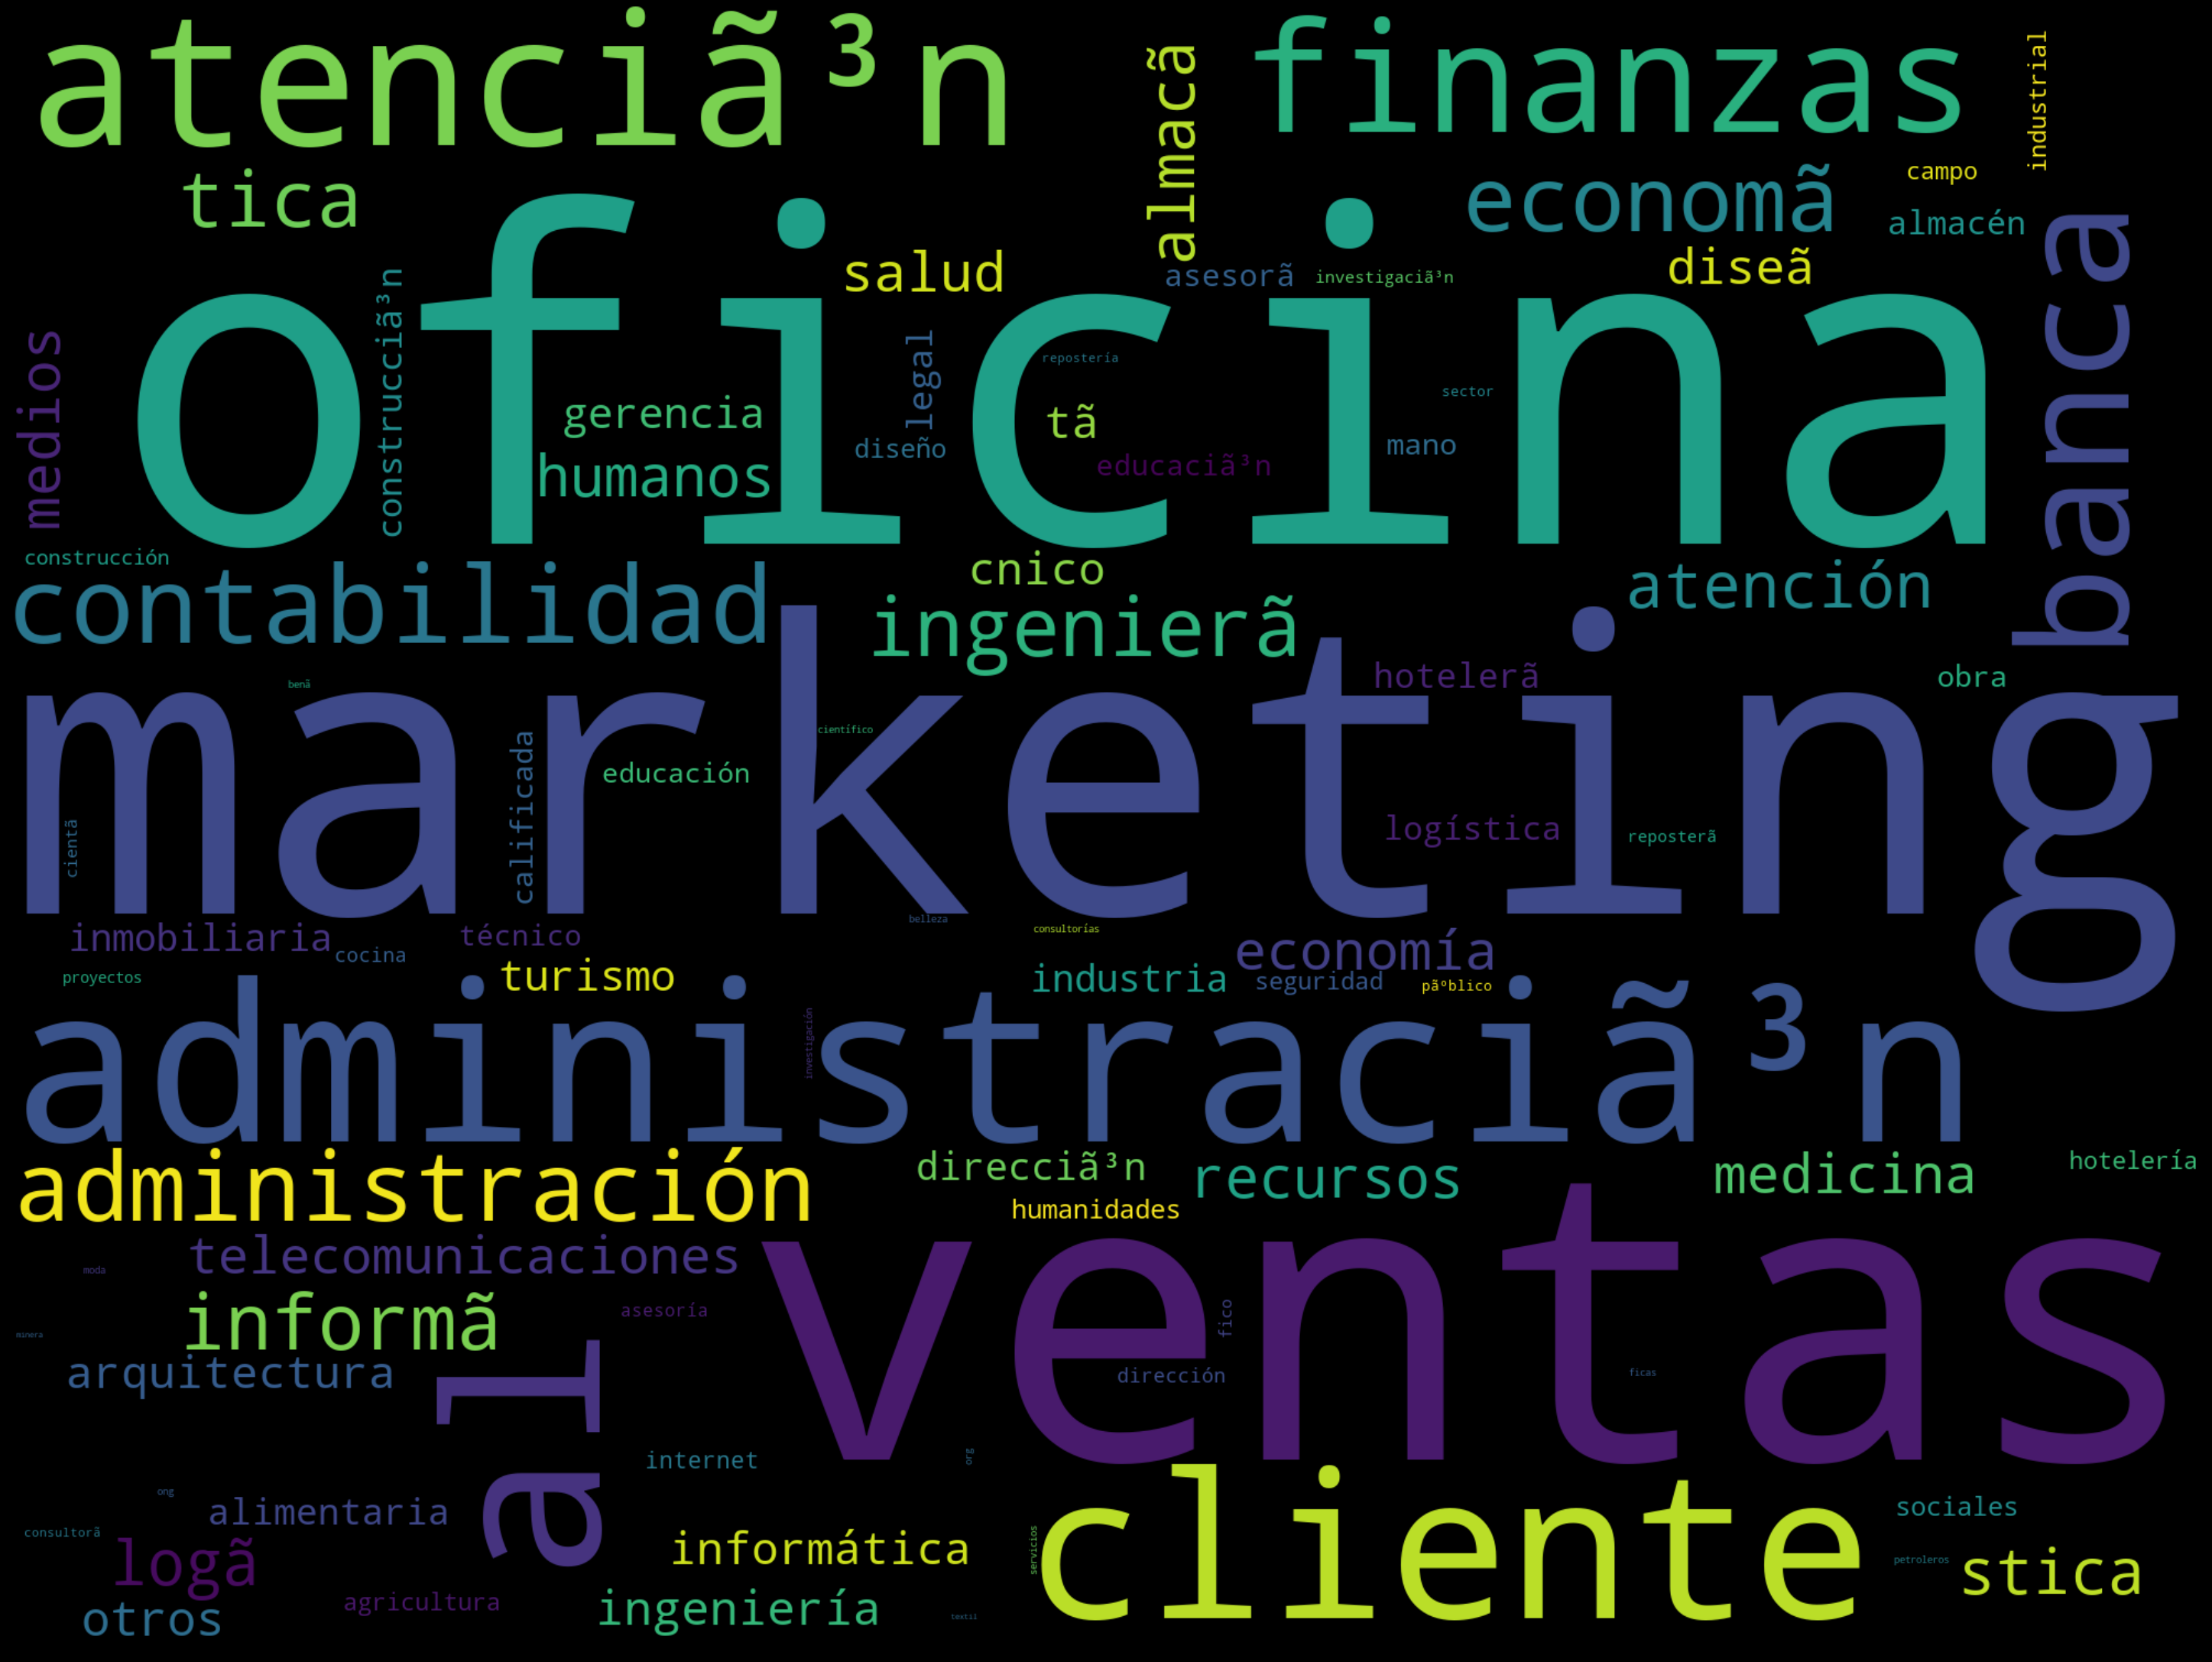

In [15]:
wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(clean_text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
nombres_cargos = column2text(df_new['Nombre_cargo'])

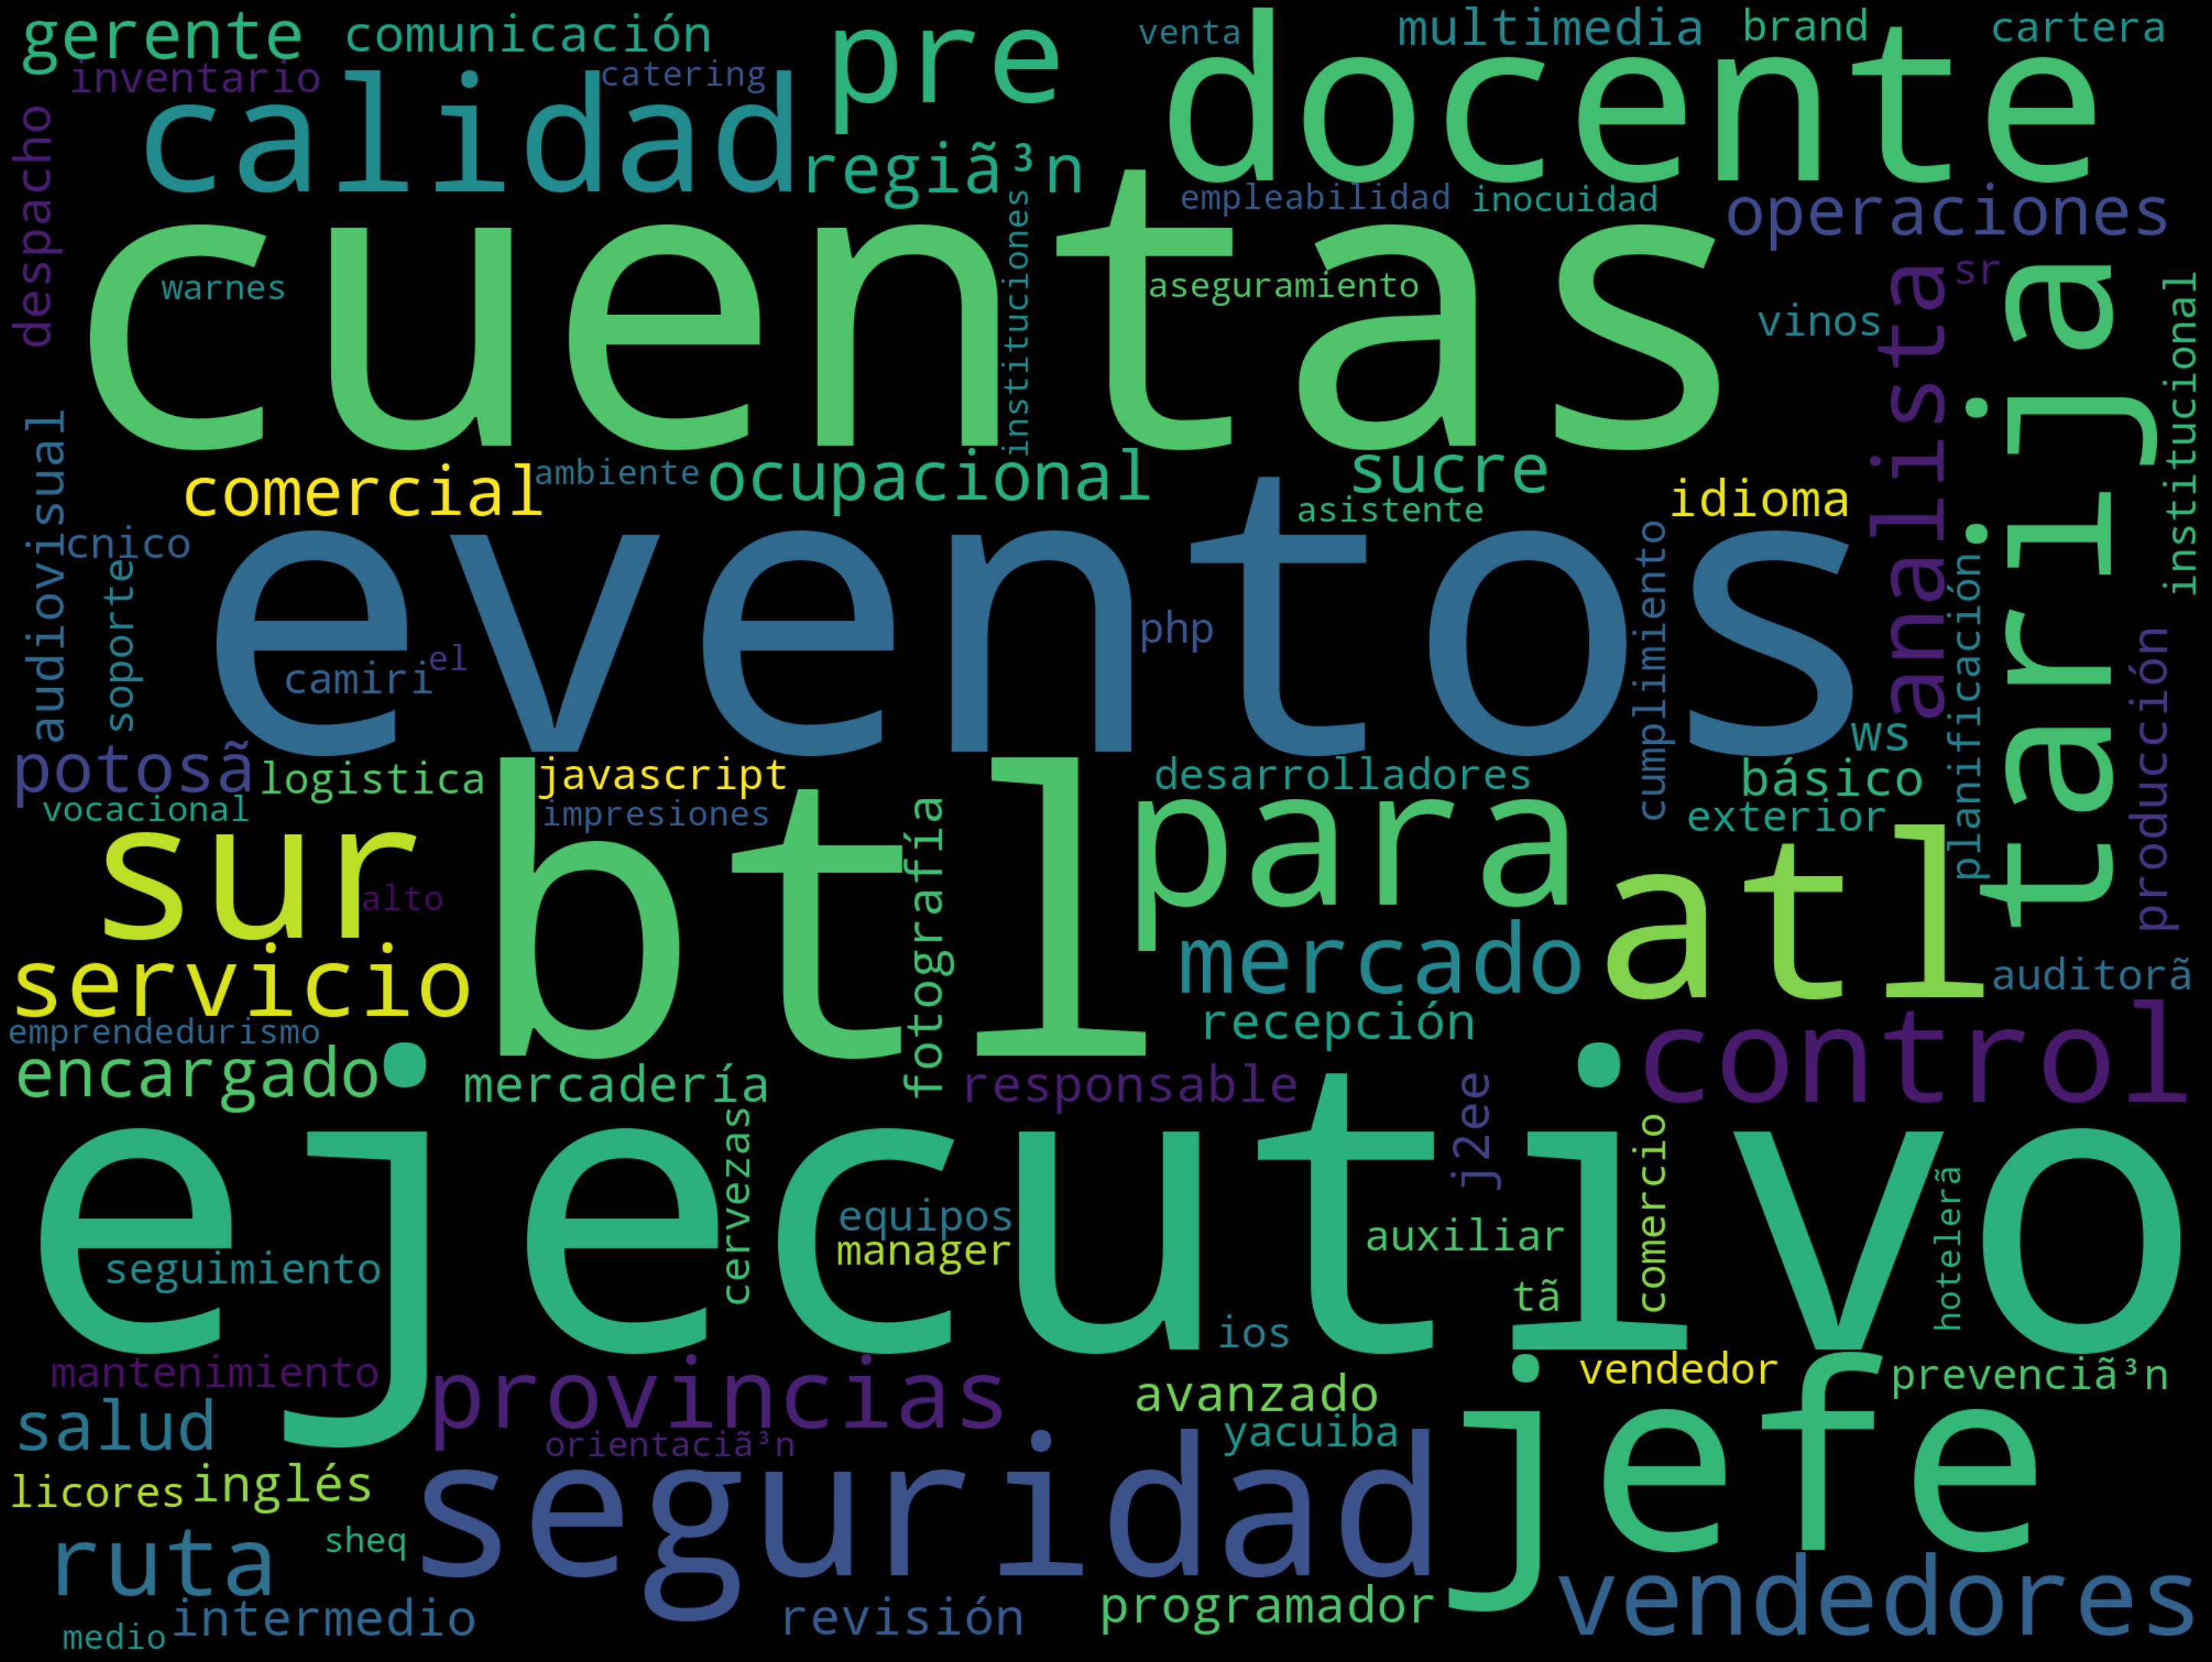

In [17]:
#set the stopwords list
stopwords= set(STOPWORDS)

#append new words to the stopwords list
new_words = {'de', 'al', 'santa', 'cruz', 'cochabamba', 'la', 'paz'}
new_stopwords=stopwords.union(new_words)

wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = new_stopwords).generate(str(nombres_cargos))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ver qué dias publican más publicidad?
en qué mes?
de los informaticos, cuantos son en banca?
eliminar stopwords espanol

If informatica:
    descripcion = 
    wordCloud(descripcion)